In [1]:
import pandas as pd
import os
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [2]:
file_path = 'annual/data/18/MI_upgrade18_metadata_and_annual_results.csv'

In [3]:
df = pd.read_csv(file_path, low_memory=False)

In [4]:
# Group by 'in.comstock_building_type'
grouped = df.groupby('in.comstock_building_type')

In [41]:
# Adjust display settings to show more columns
pd.set_option('display.max_columns', None)  # This will allow all columns to be displayed

# Get the group for 'SmallOffice'
small_office_group = grouped.get_group('SmallOffice')
small_office_group = small_office_group.drop(columns=['in.building_subtype'])
# Compute summary statistics for the 'SmallOffice' group
# Filter columns that match the pattern 'in.*' and describe those columns
in_columns = small_office_group.filter(regex='^in\.').columns

# Compute summary statistics for columns with 'in.*' in their name, including all types of data
summary_descriptions_in_columns = small_office_group[in_columns].describe(include='all')

#print(summary_descriptions_in_columns)

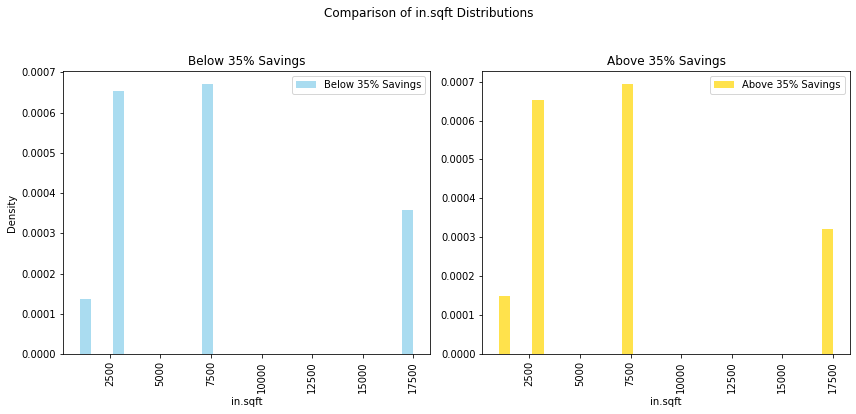

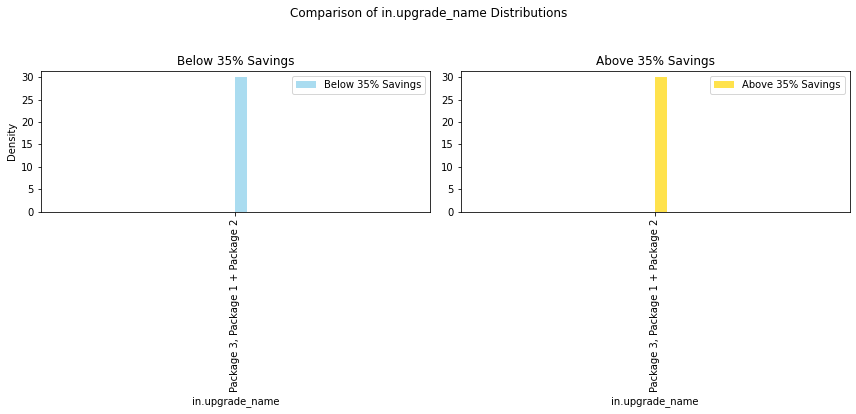

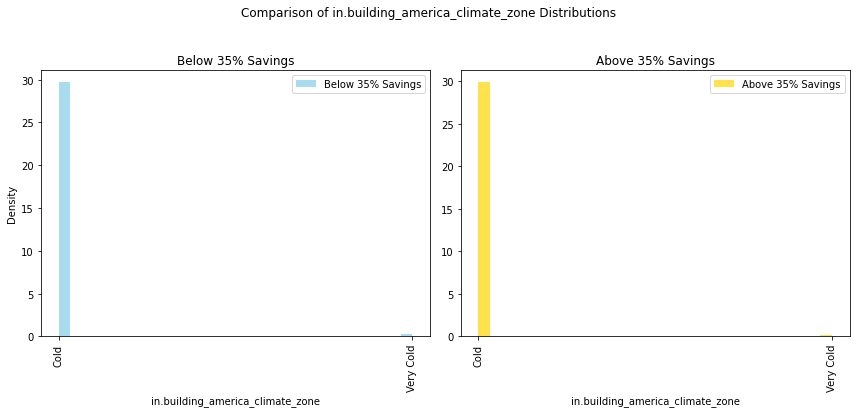

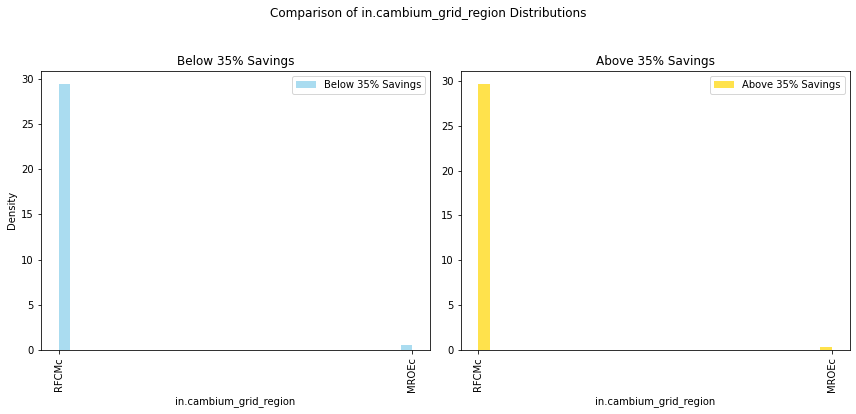

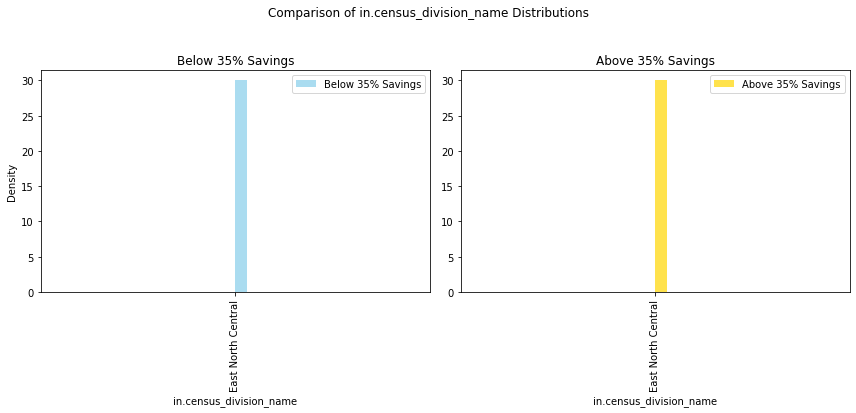

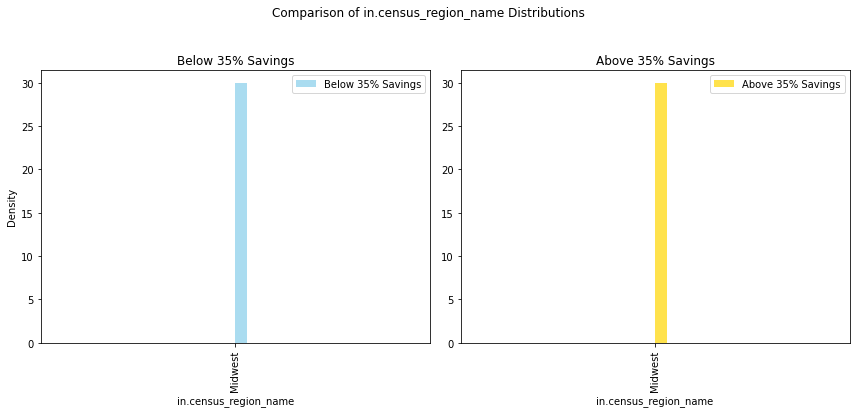

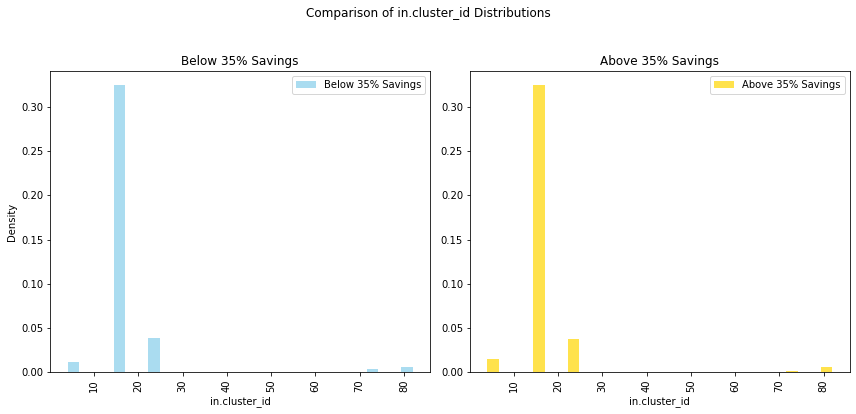

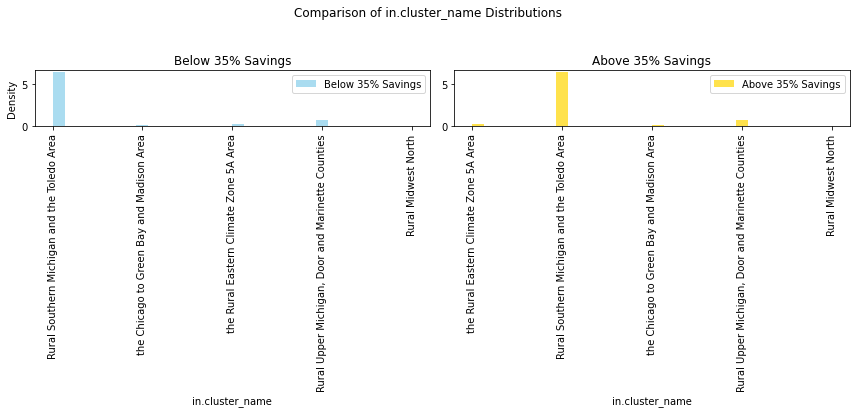

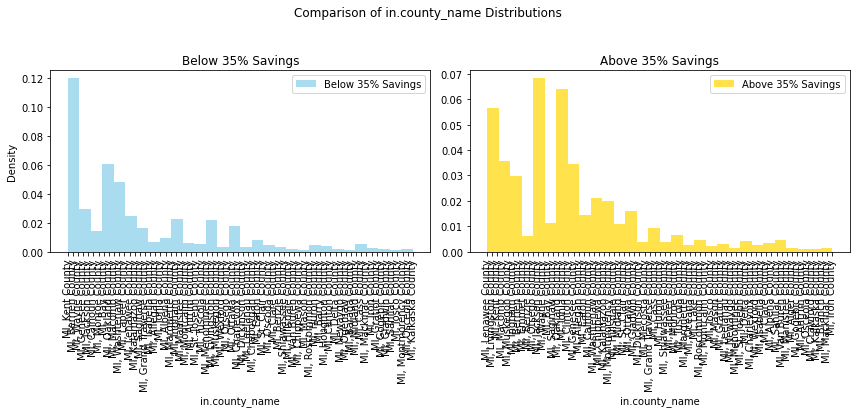

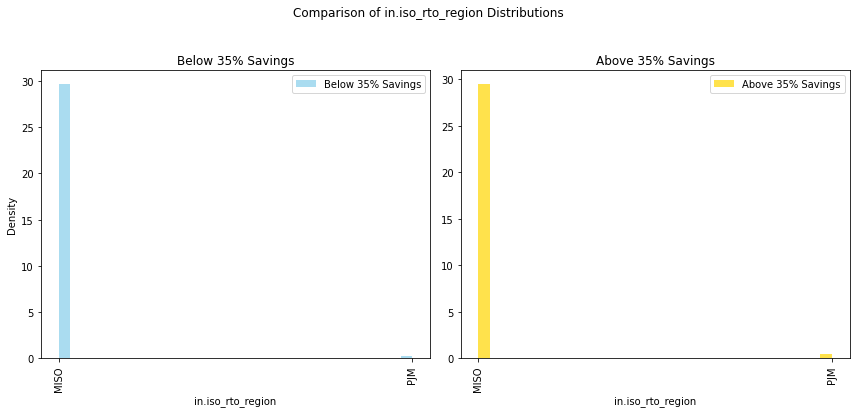

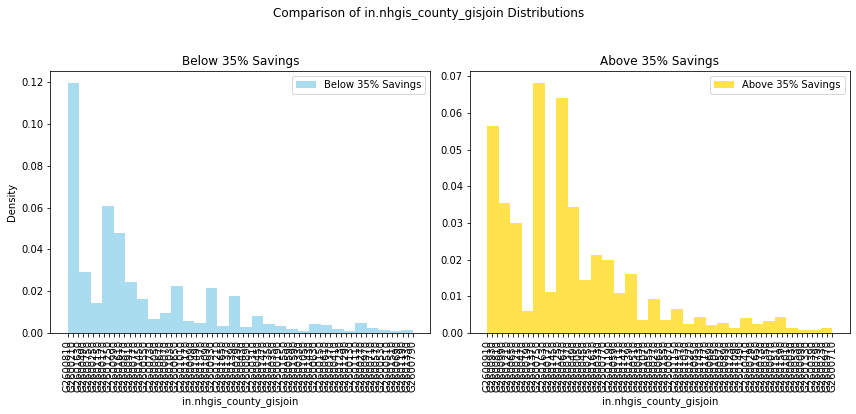

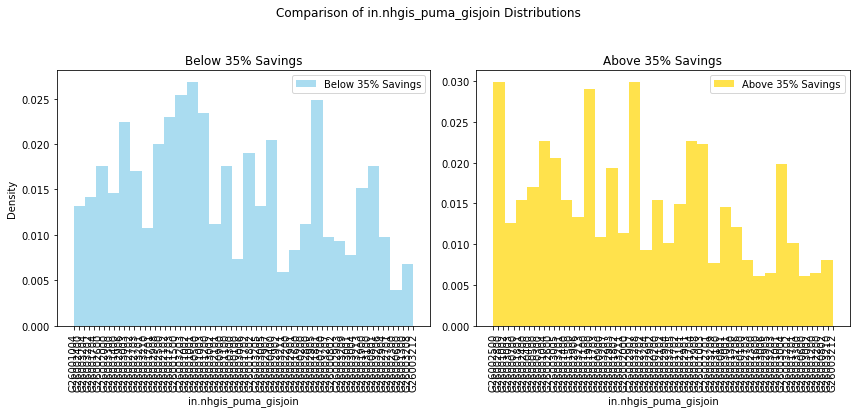

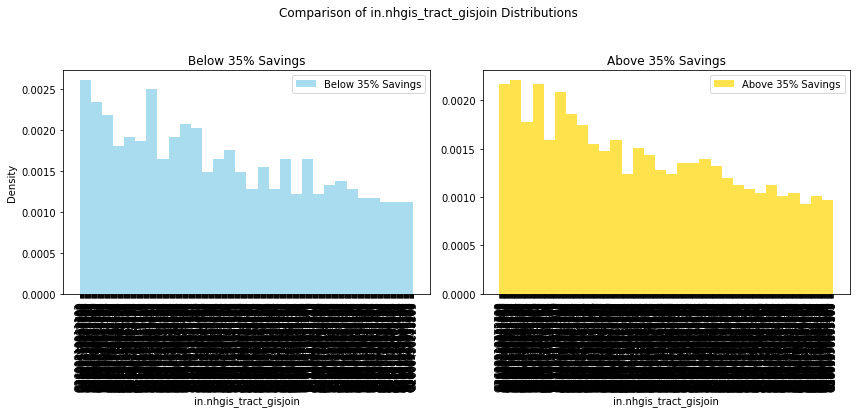

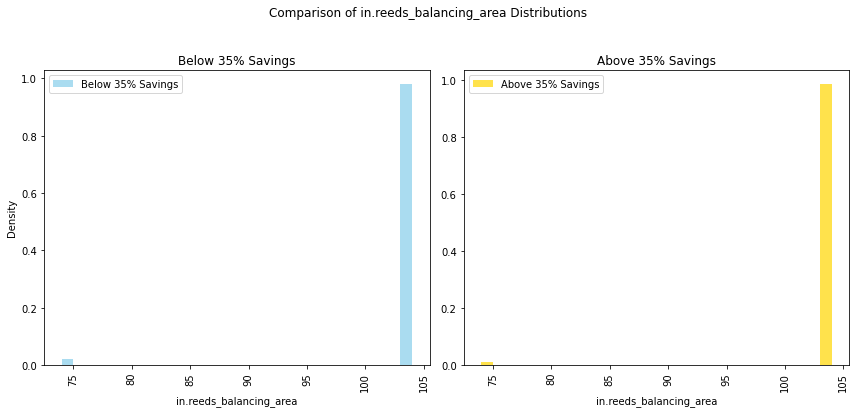

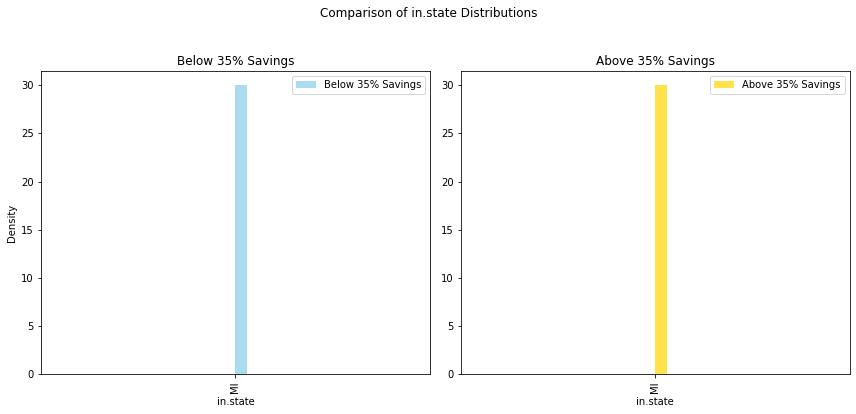

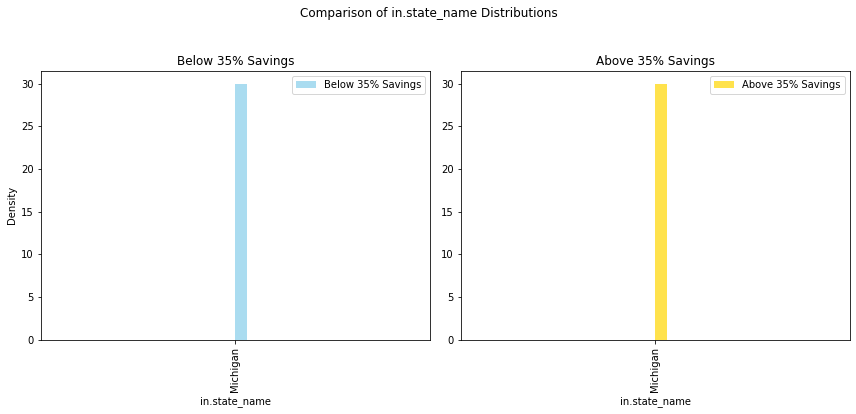

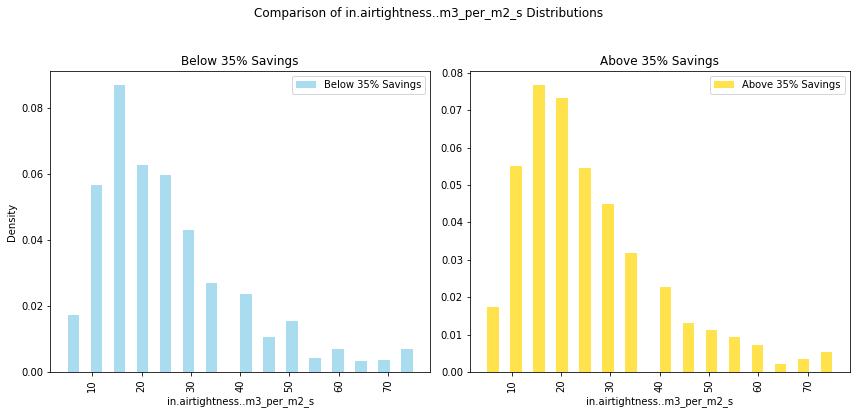

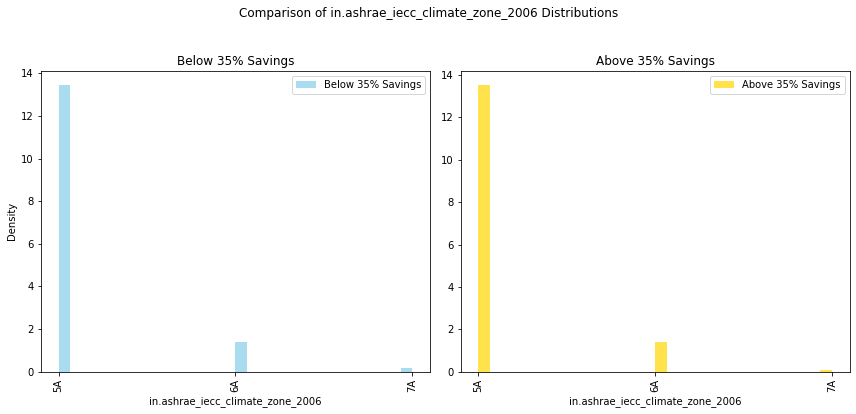

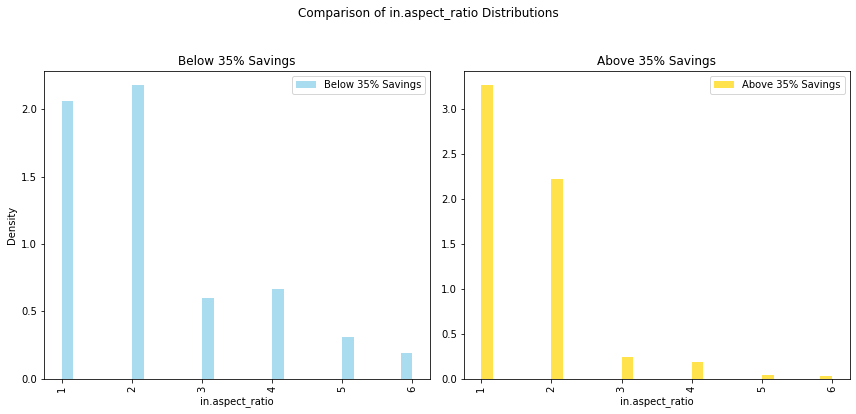

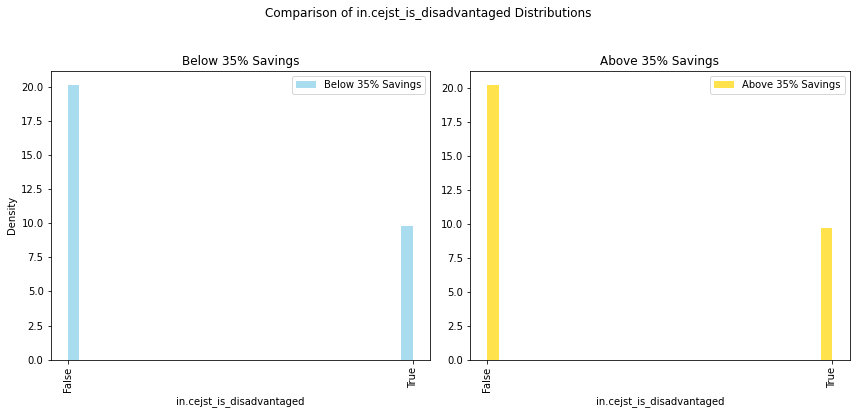

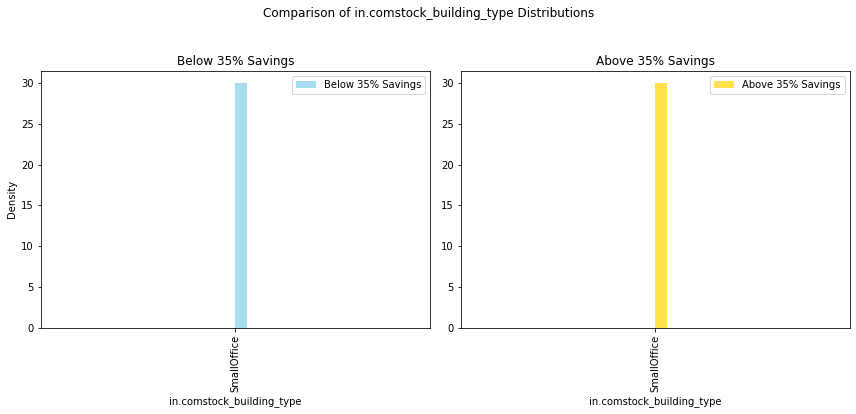

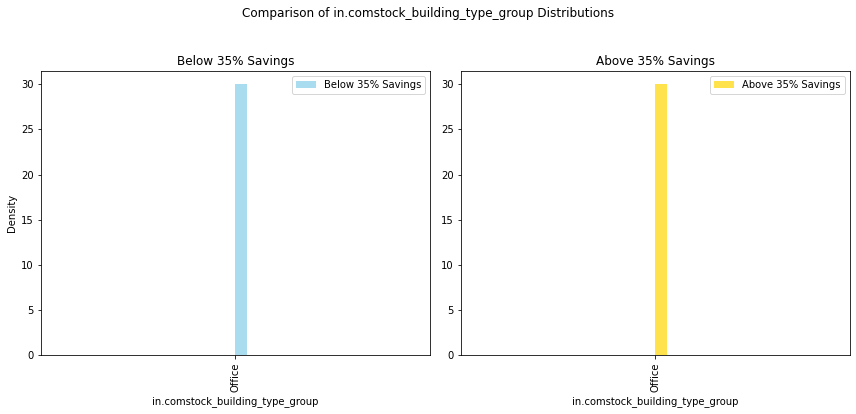

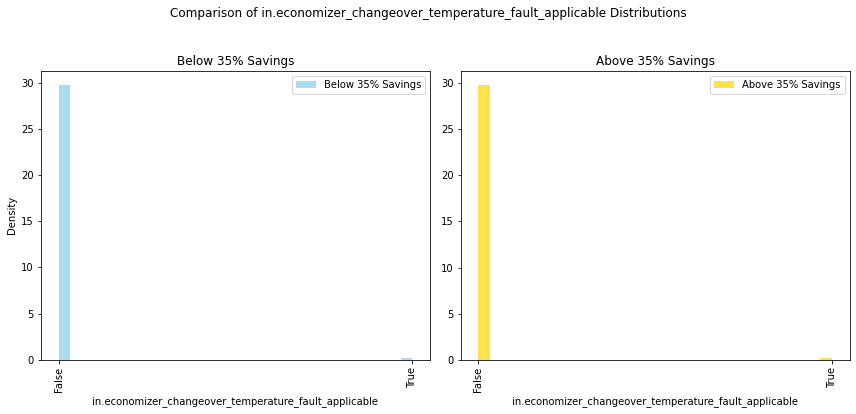

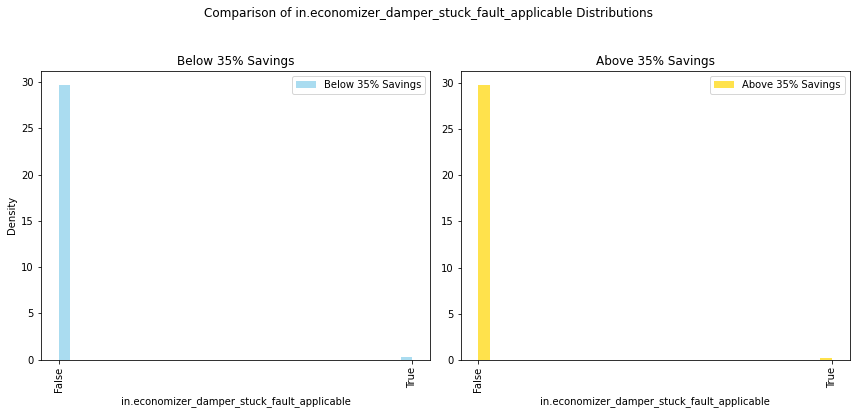

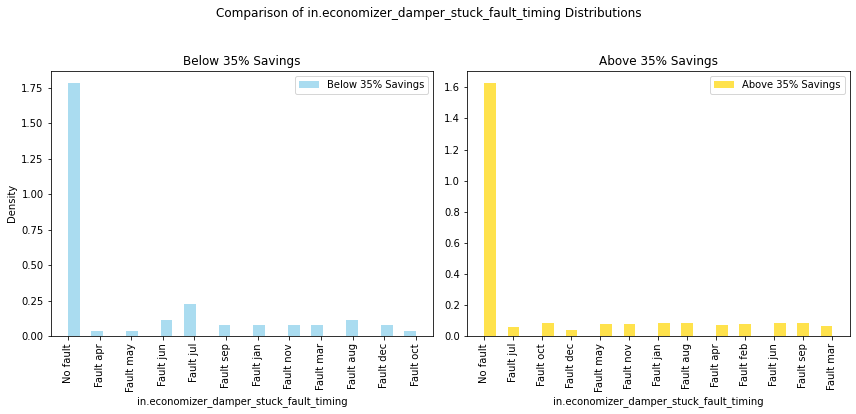

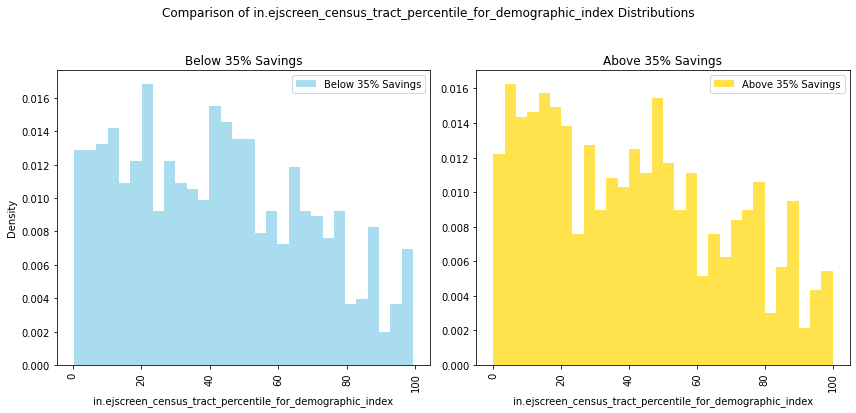

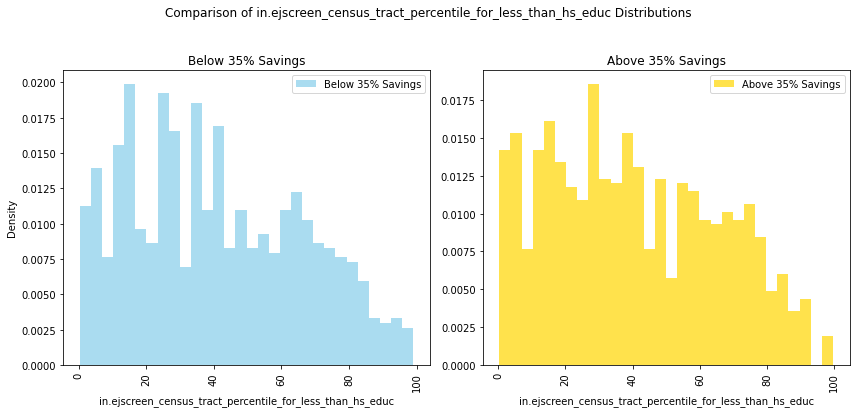

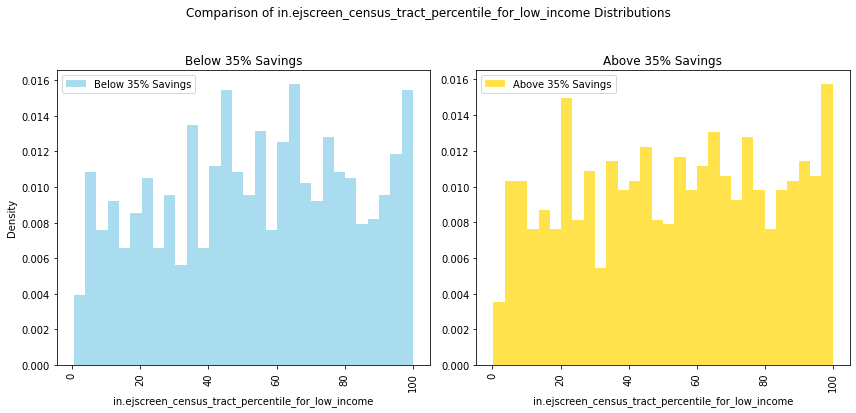

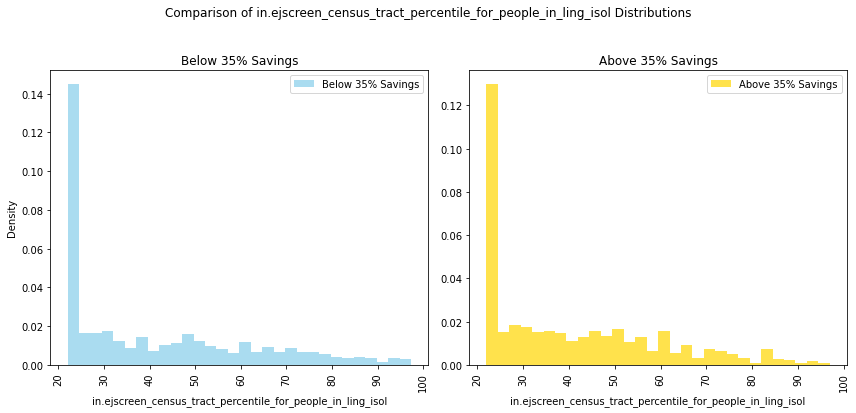

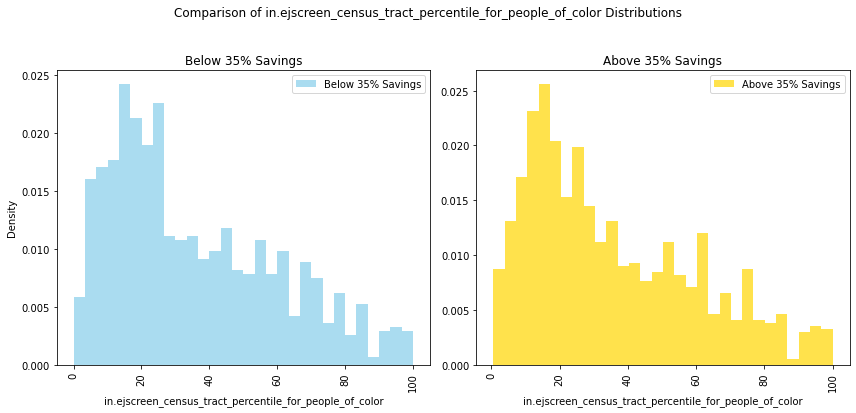

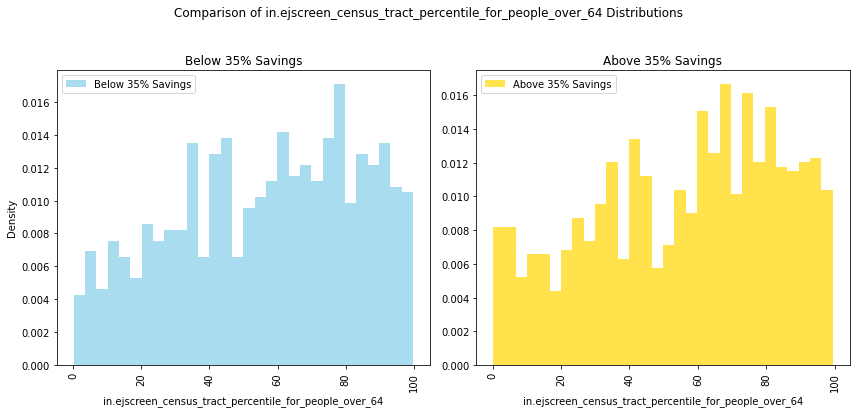

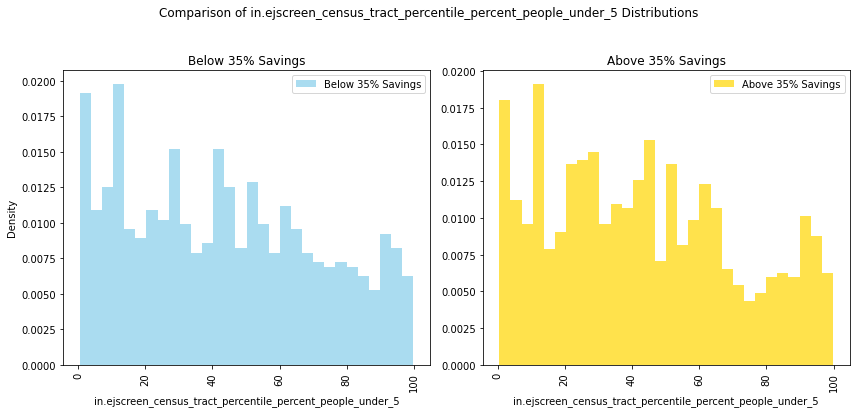

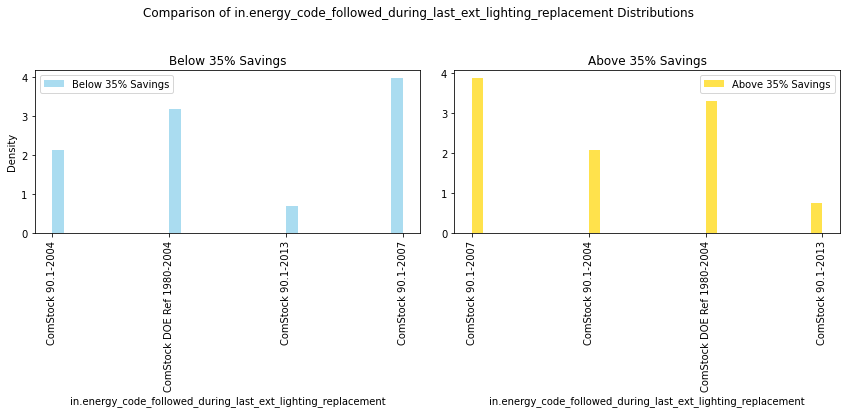

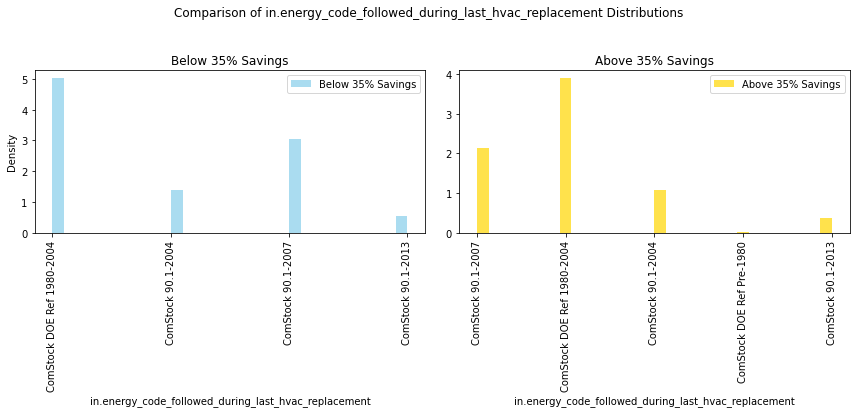

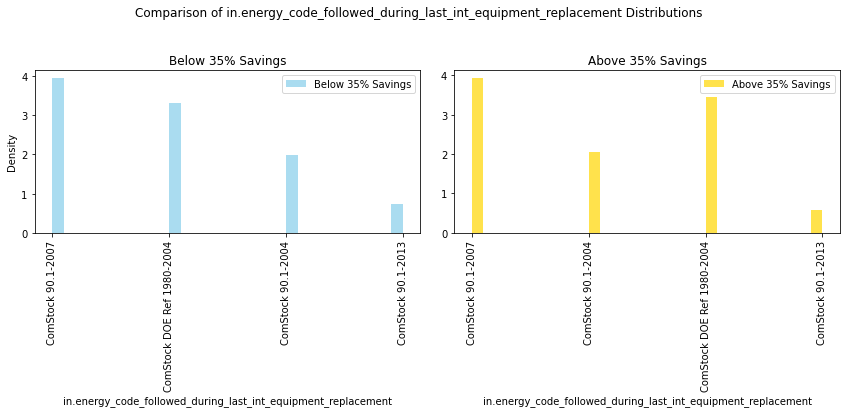

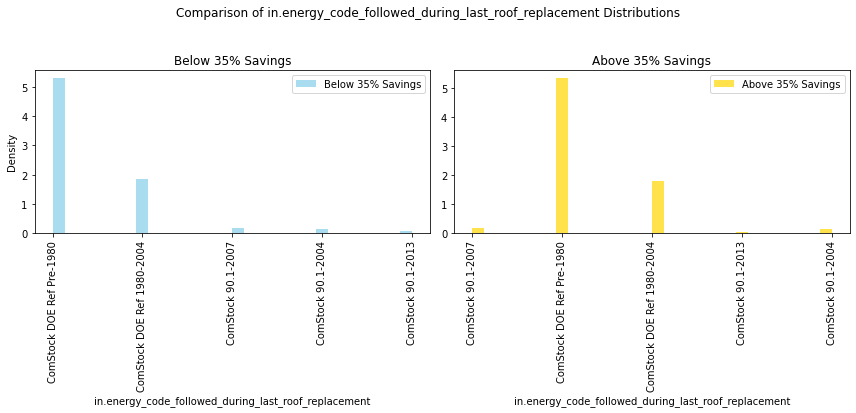

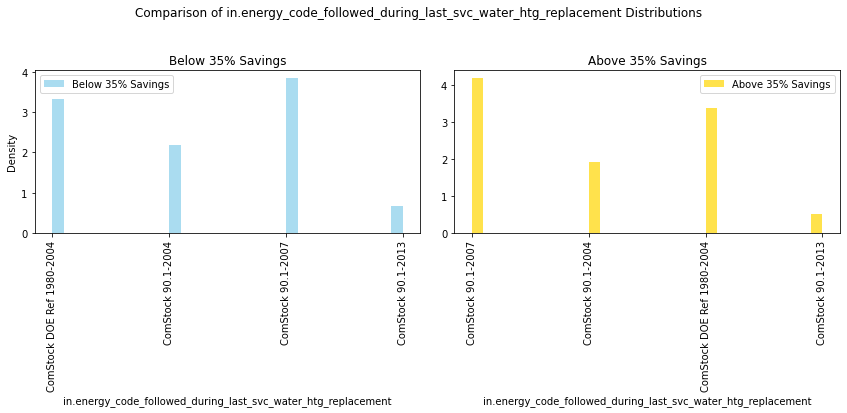

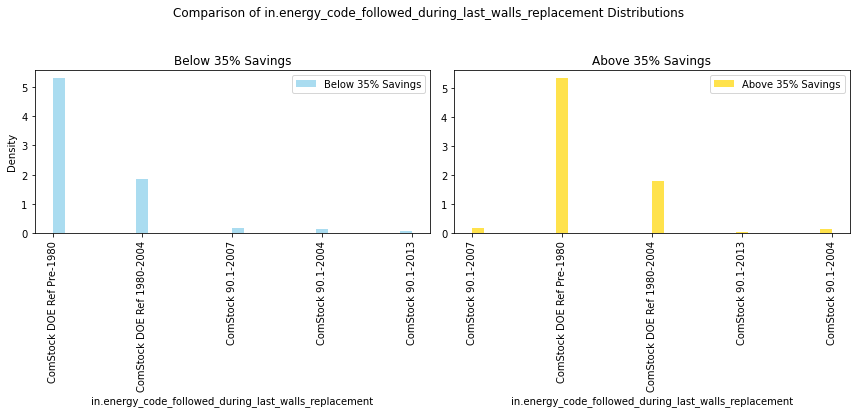

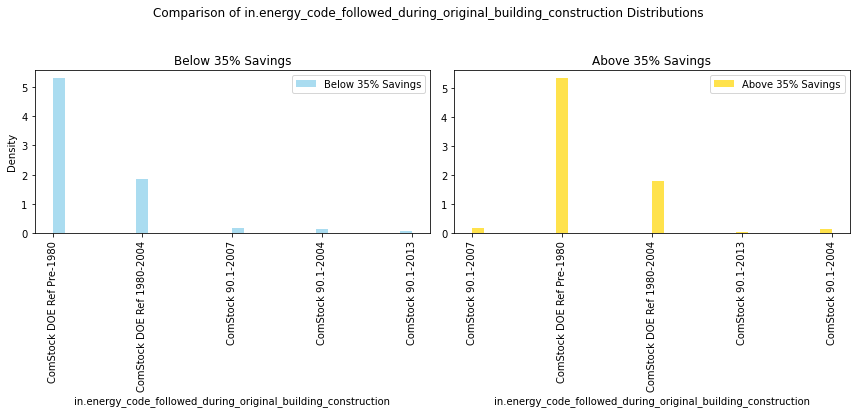

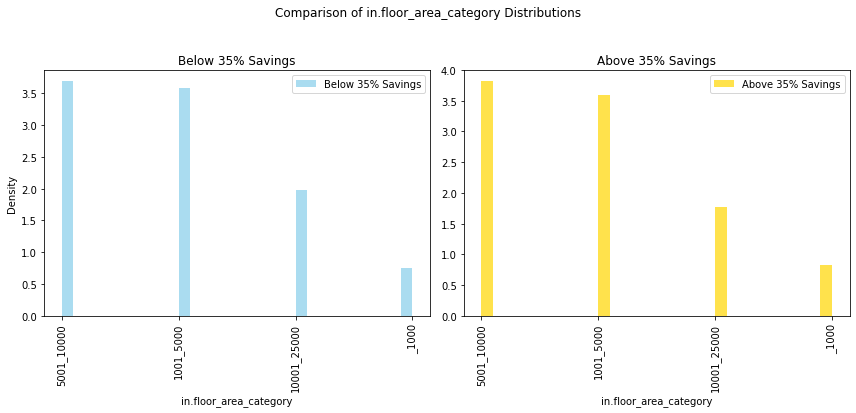

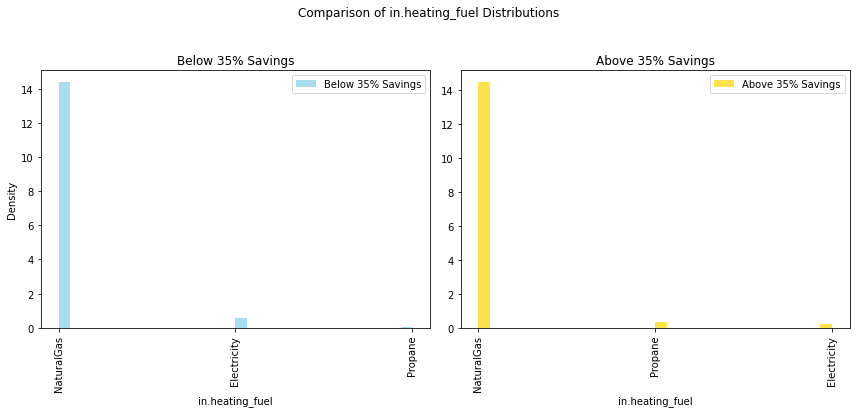

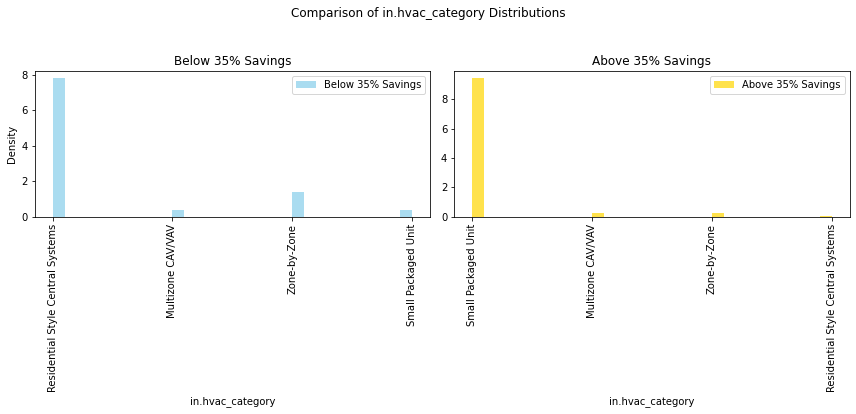

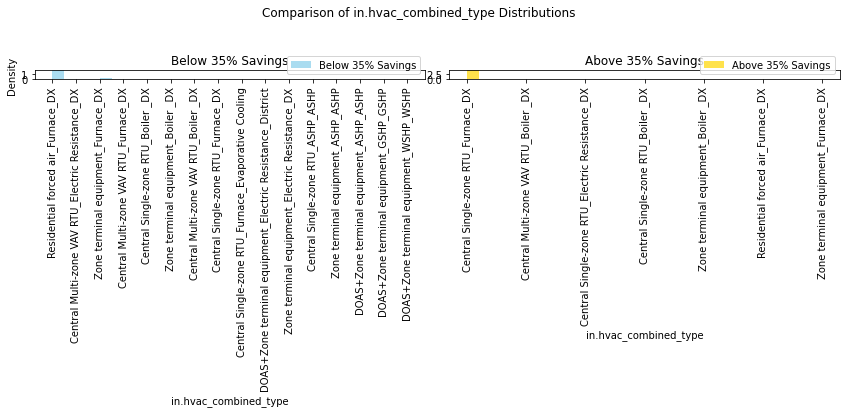

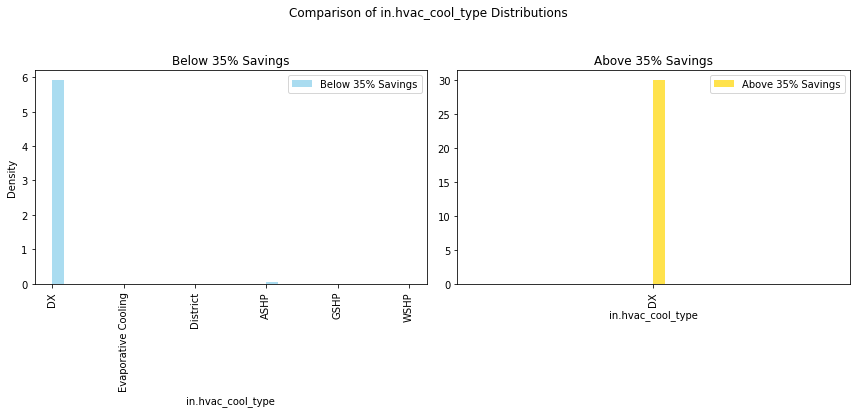

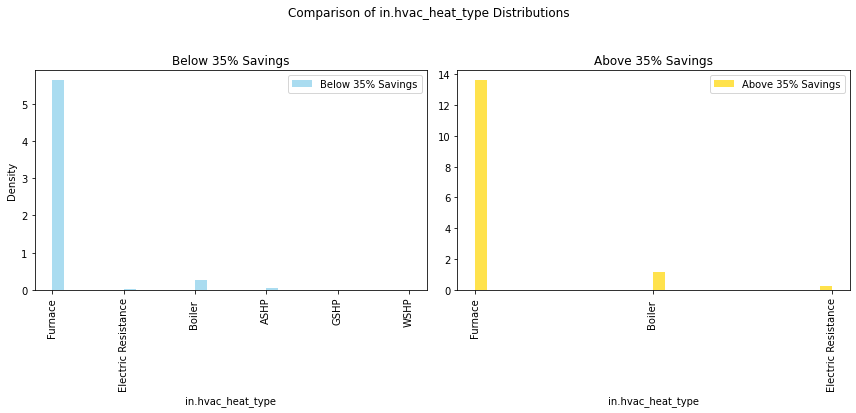

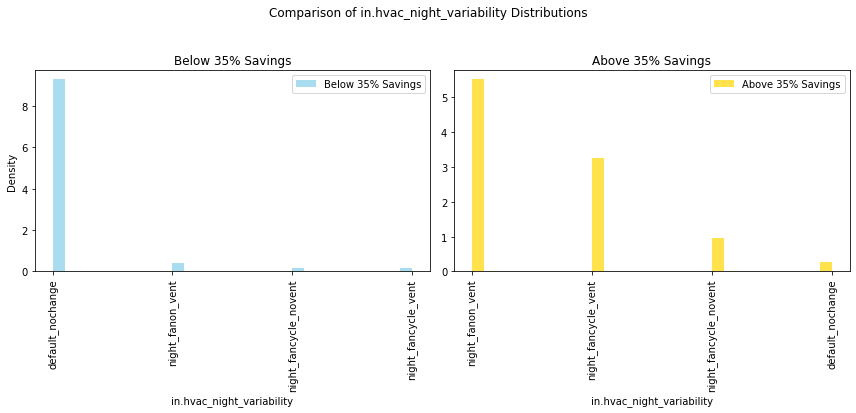

C:\Users\Brian\AppData\Local\Temp\ipykernel_33068\2659674535.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


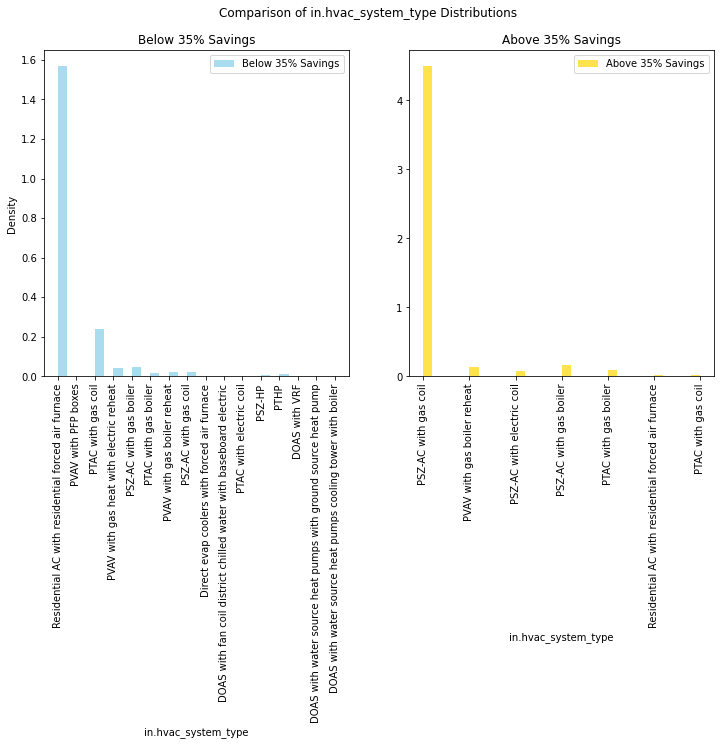

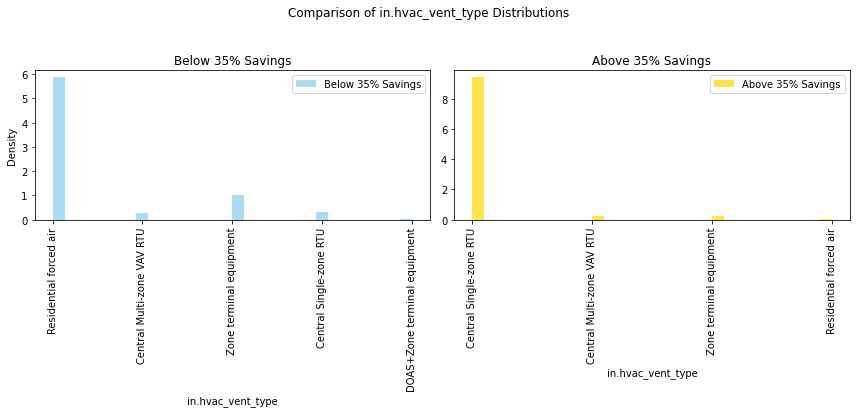

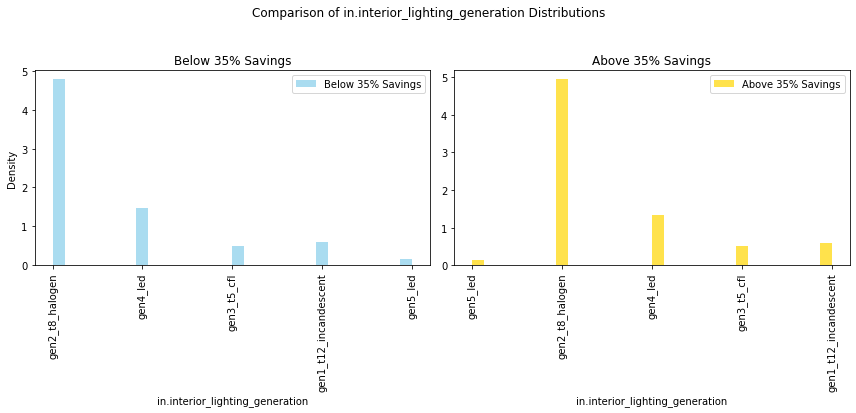

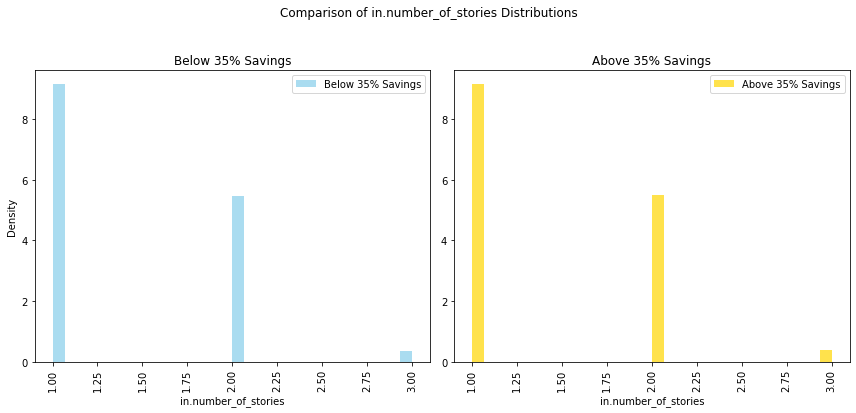

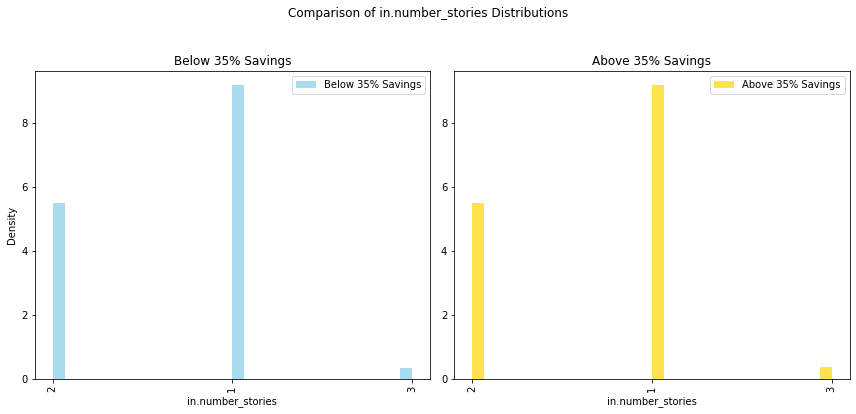

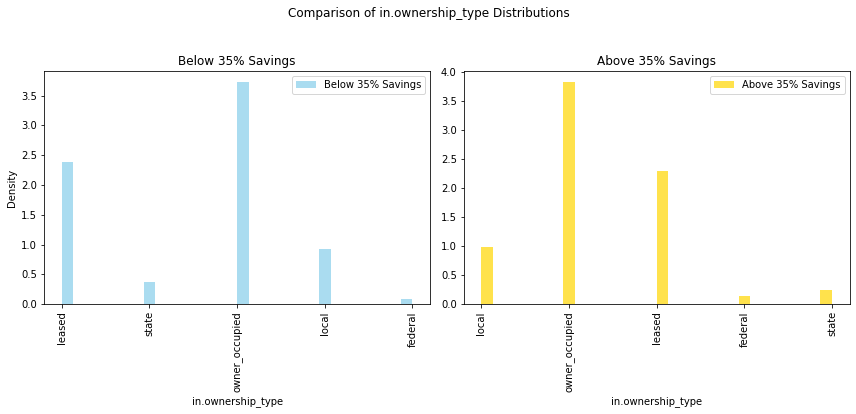

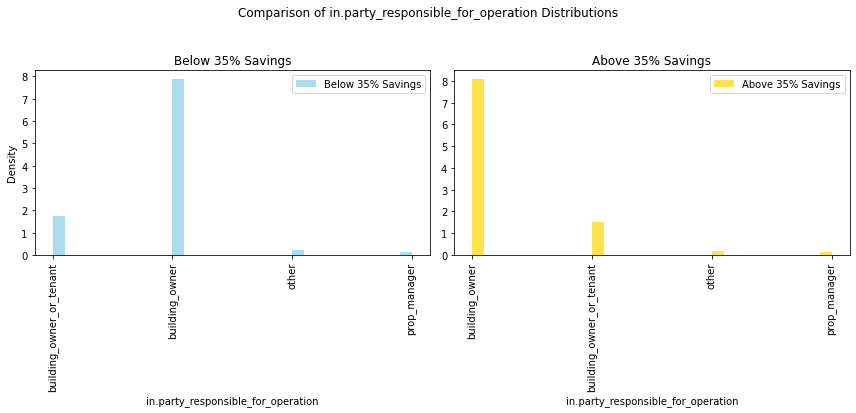

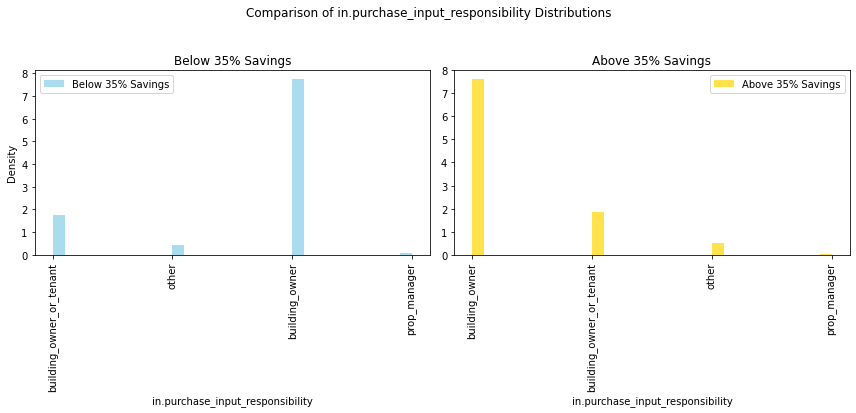

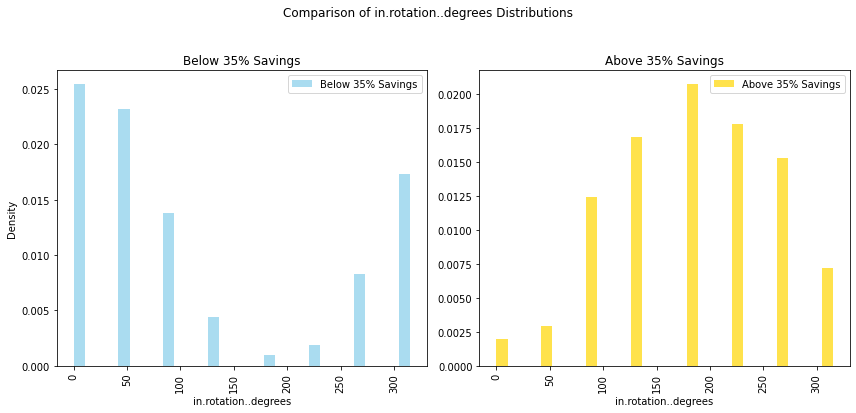

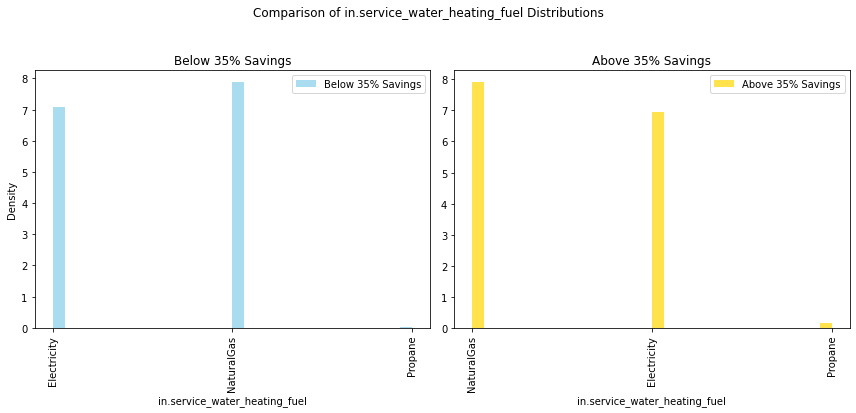

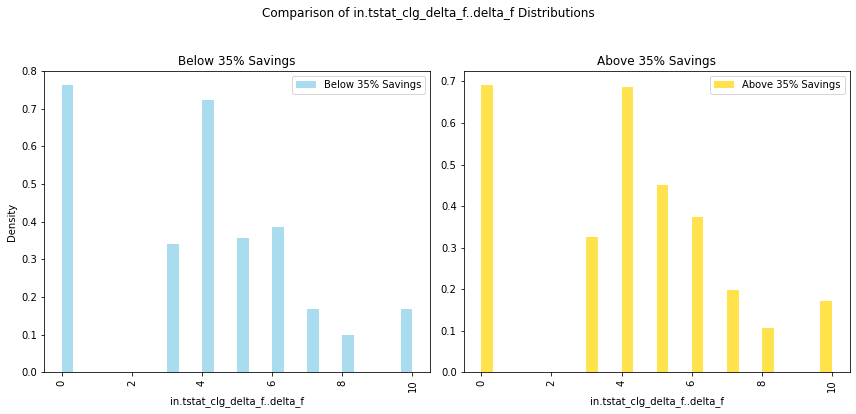

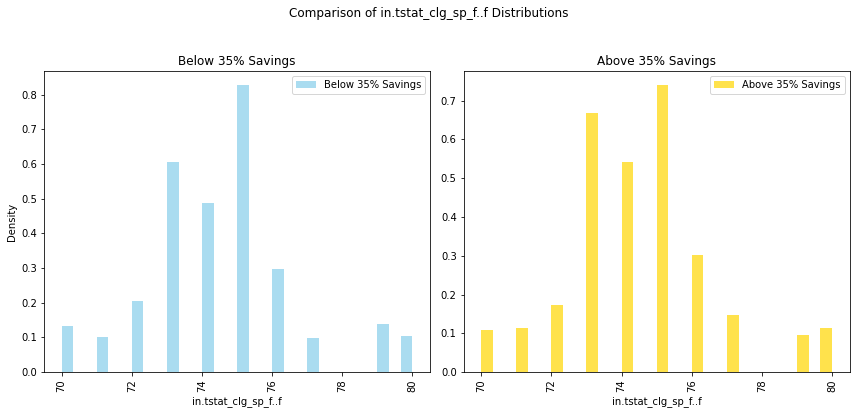

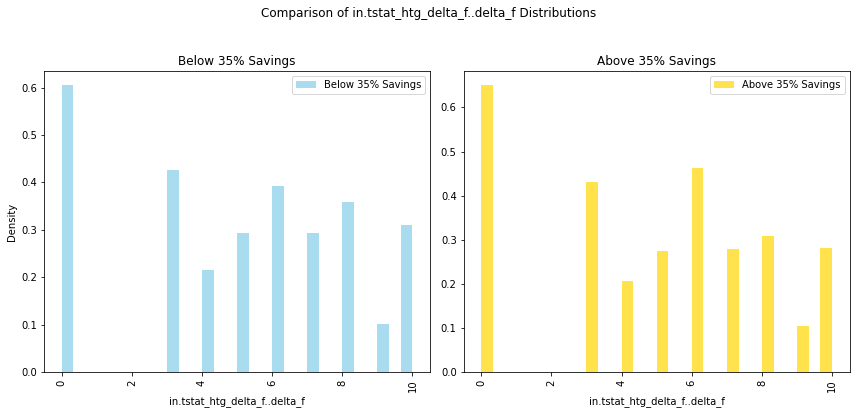

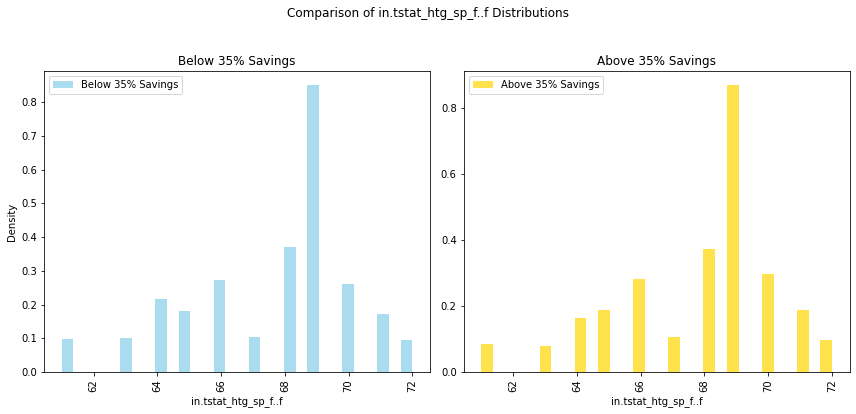

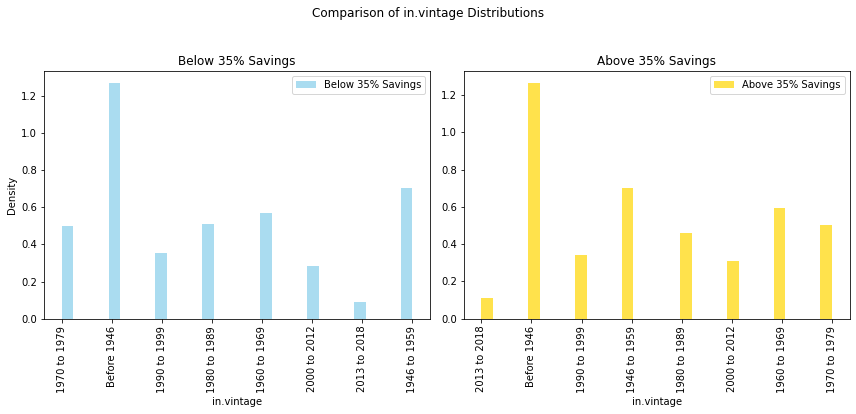

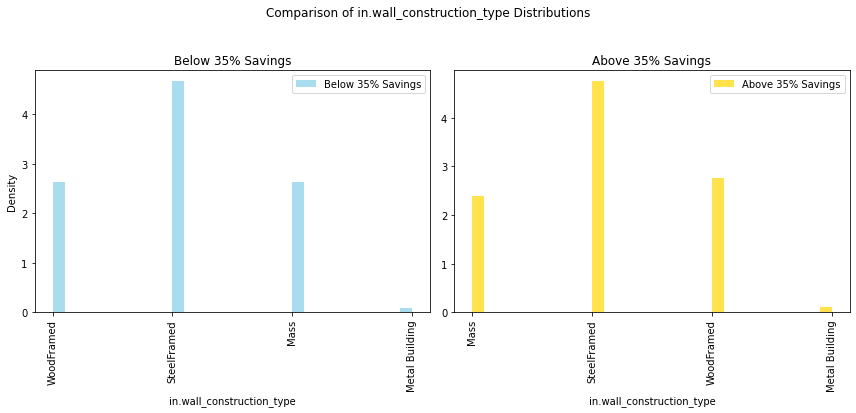

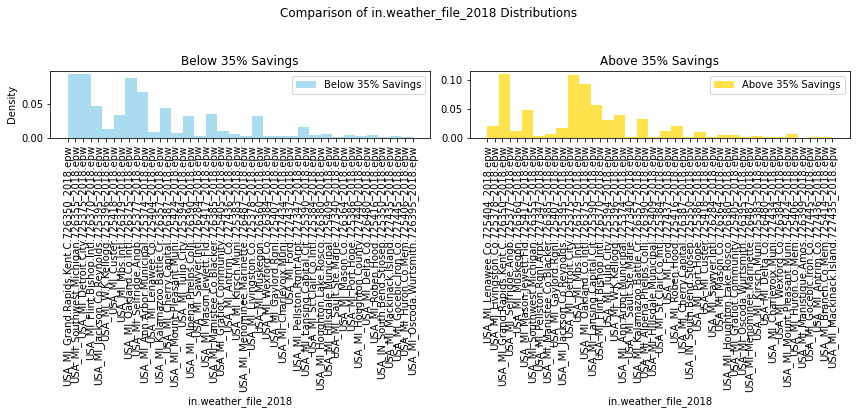

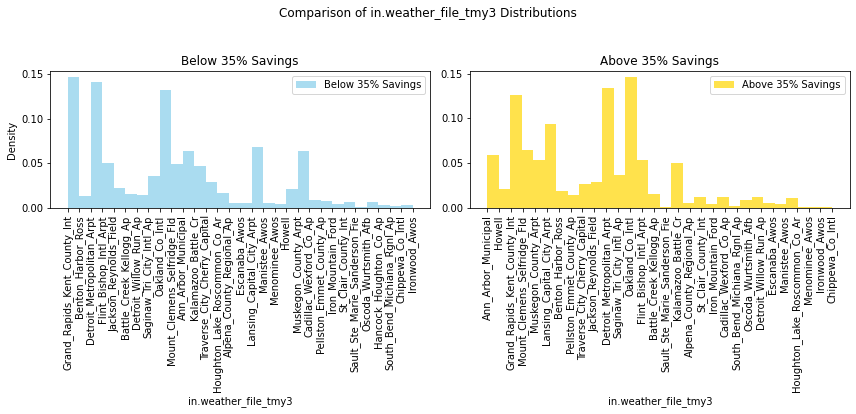

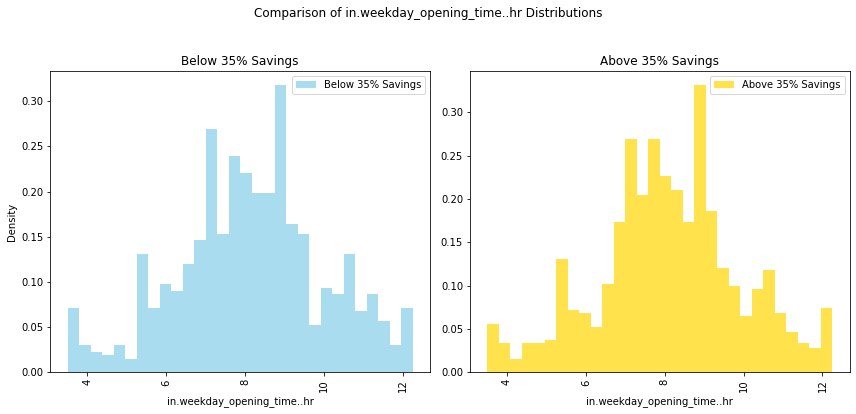

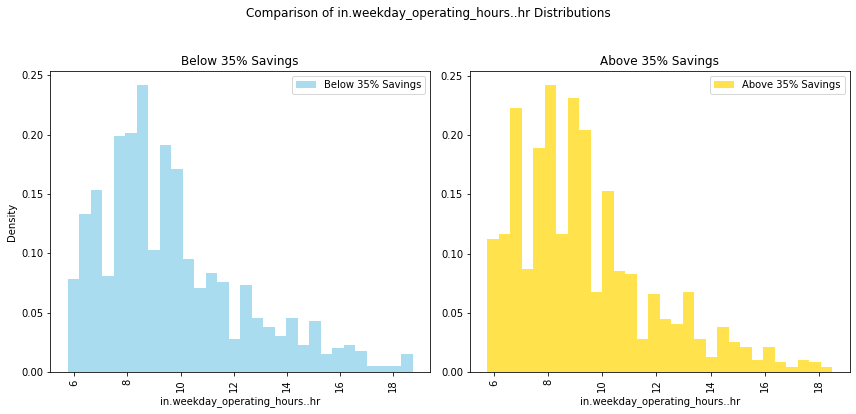

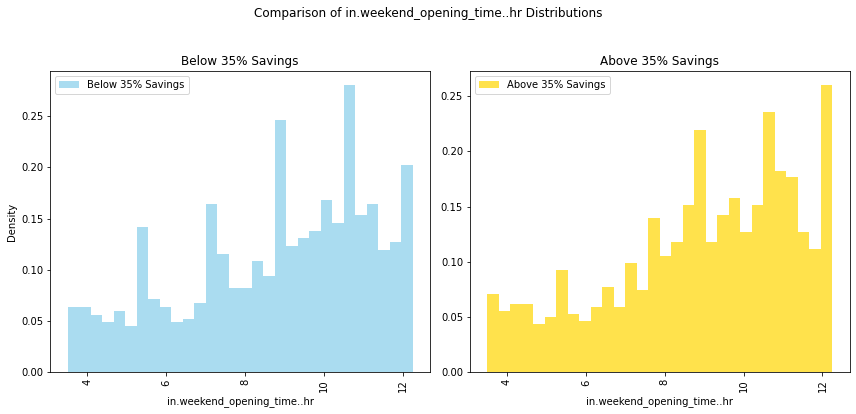

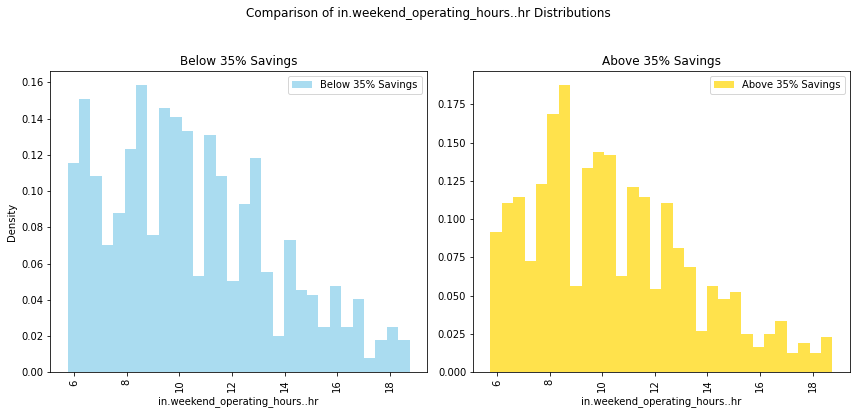

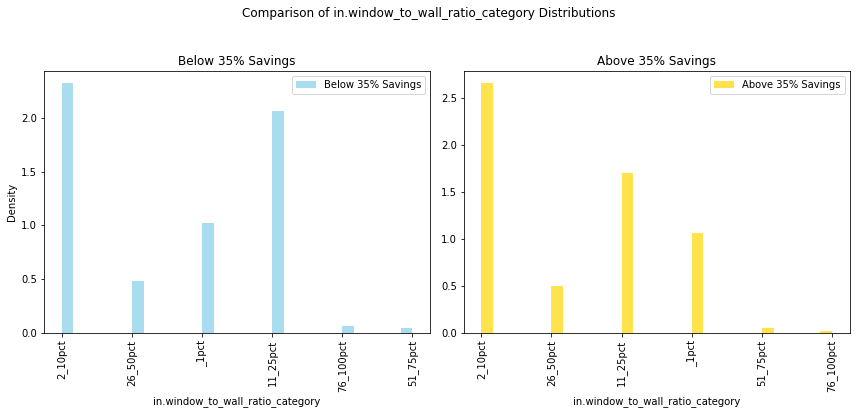

C:\Users\Brian\AppData\Local\Temp\ipykernel_33068\2659674535.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


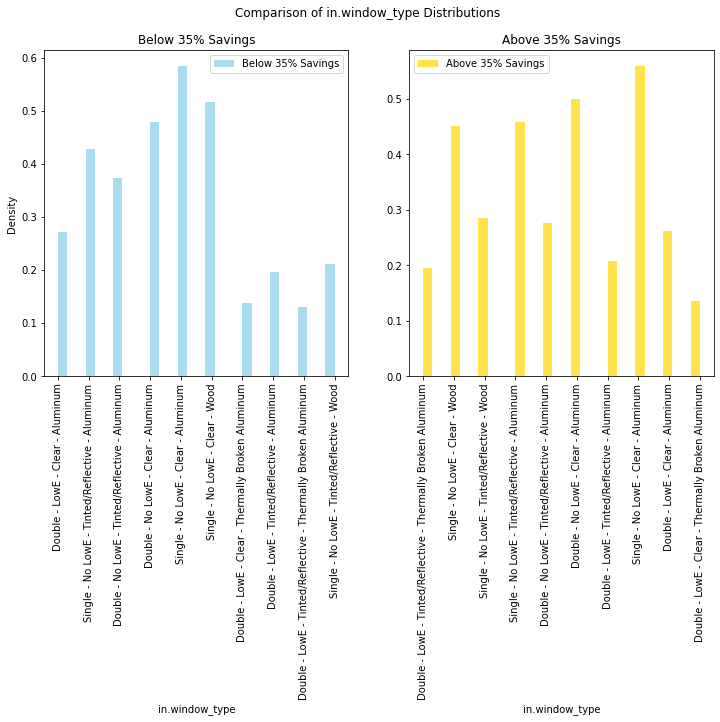

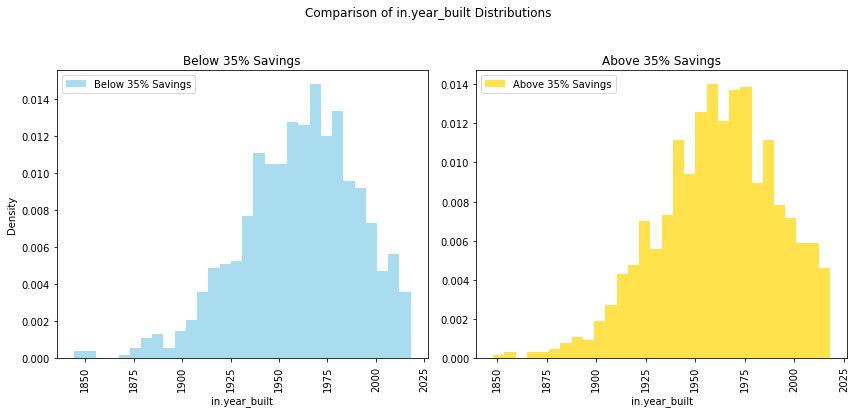

In [42]:
# Column name for convenience
column_name = 'calc.percent_savings.site_energy.total.energy_consumption_intensity..percent'

# Assuming small_office_group is your DataFrame filtered to 'SmallOffice'
# And column_name is defined as 'calc.percent_savings.site_energy.total.energy_consumption_intensity..percent'

# Convert boolean columns to strings
for col in small_office_group.columns:
    if small_office_group[col].dtype == bool:
        small_office_group[col] = small_office_group[col].astype(str)

# Correctly filter the DataFrame, not just the column names
below_35_df = small_office_group[small_office_group[column_name] < 0.35]
above_35_df = small_office_group[small_office_group[column_name] > 0.35]

# Filter columns that match the pattern 'in.*'
in_columns = small_office_group.filter(regex='^in\.').columns

# Assuming below_35_df and above_35_df are already defined
# And in_columns contains the list of 'in.' column names

# Iterate over the 'in.' columns to create plots
for column_name in in_columns:
    plt.figure(figsize=(12, 6))  # Adjusted figsize for better label visibility
    plt.suptitle(f'Comparison of {column_name} Distributions')

    # Plot histogram for subset below 35%
    plt.subplot(1, 2, 1)
    plt.hist(below_35_df[column_name].dropna(), bins=30, color='skyblue', alpha=0.7, density=True, label='Below 35% Savings')
    plt.title('Below 35% Savings')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.legend()
    plt.xticks(rotation='vertical')  # Rotate x-axis labels to vertical

    # Plot histogram for subset above 35%
    plt.subplot(1, 2, 2)
    plt.hist(above_35_df[column_name].dropna(), bins=30, color='gold', alpha=0.7, density=True, label='Above 35% Savings')
    plt.title('Above 35% Savings')
    plt.xlabel(column_name)
    plt.legend()
    plt.xticks(rotation='vertical')  # Rotate x-axis labels to vertical

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()